In [8]:
#Check the versions of libraries
#Python vesrion
import sys
print ('Python : {}'.format(sys.version))
import scipy
print ('Scipy:{}'.format(scipy.__version__))
import numpy
print ('Numpy:{}'.format(numpy.__version__))
import matplotlib
print ("Matplotlib:{}".format(matplotlib.__version__))
import pandas
print ("Pandas:{}".format(pandas.__version__))
import sklearn
print ("Sklearn:{}".format(sklearn.__version__))

Python : 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Scipy:1.2.1
Numpy:1.16.2
Matplotlib:3.0.3
Pandas:0.24.2
Sklearn:0.20.3


In [10]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.shape

(150, 6)

In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

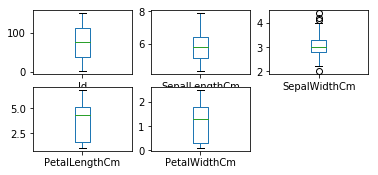

In [17]:
#Univariate Plot
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

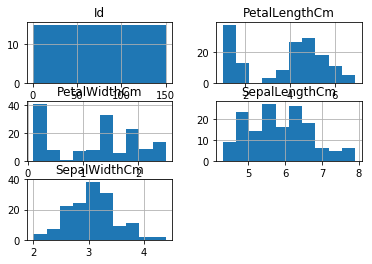

In [18]:
#Histogram
df.hist()
plt.show()

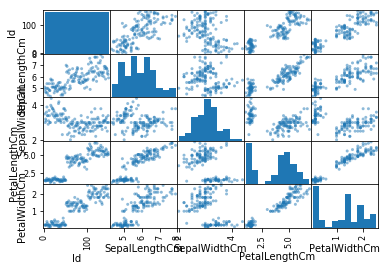

In [21]:
#Multivariate Plot
#scatter Plot
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

In [32]:
#validate dataset
array = df.values
X = array[:,1:5]
Y = array[:,5]
validation_size = 0.20
seed = 6
from sklearn import model_selection 
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [43]:
#Test Hardnees
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
scoring = 'accuracy'
#Spot check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'scale')))
#Evalaute model in each turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f   (%f)"%(name, cv_results.mean(), cv_results.std())
    print (msg)

LR : 0.933333   (0.050000)
LDA : 0.975000   (0.038188)
KNN : 0.958333   (0.055902)
CART : 0.958333   (0.041667)
NB : 0.966667   (0.055277)
SVM : 0.950000   (0.076376)
